In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit
from scipy.optimize import curve_fit

In [3]:
#Website used for data
#https://gwosc.org/eventapi/html/GWTC-3-confident/

conf3 = pd.read_csv("C:/Users/plaid/Downloads/confident3.csv")
pd.set_option('display.max_columns', None)
conf3


,id,commonName,version,catalog.shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,chi_eff,chi_eff_lower,chi_eff_upper,total_mass_source,total_mass_source_lower,total_mass_source_upper,chirp_mass_source,chirp_mass_source_lower,chirp_mass_source_upper,chirp_mass,chirp_mass_lower,chirp_mass_upper,redshift,redshift_lower,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW191103_012549-v1,GW191103_012549,1,GWTC-3-confident,1.256780e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,11.8,-2.2,6.2,7.90,-2.40,1.70,8.9,-0.5,0.3,990.0,-470.0,500.0,0.21,-0.10,0.16,20.00,-1.80,3.70,8.34,-0.57,0.66,NaN,NaN,NaN,0.20,-0.09,0.09,0.460000,NaN,NaN,0.94318,NaN,NaN,19.00,-1.70,3.80
1,GW191105_143521-v1,GW191105_143521,1,GWTC-3-confident,1.257000e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,10.7,-1.6,3.7,7.70,-1.90,1.40,9.7,-0.5,0.3,1150.0,-480.0,430.0,-0.02,-0.09,0.13,18.50,-1.30,2.10,7.82,-0.45,0.61,NaN,NaN,NaN,0.23,-0.09,0.07,0.012000,NaN,NaN,0.99000,NaN,NaN,17.60,-1.20,2.10
2,GW191109_010717-v1,GW191109_010717,1,GWTC-3-confident,1.257297e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,65.0,-11.0,11.0,47.00,-13.00,15.00,17.3,-0.5,0.5,1290.0,-650.0,1130.0,-0.29,-0.31,0.42,112.00,-16.00,20.00,47.50,-7.50,9.60,NaN,NaN,NaN,0.25,-0.12,0.18,0.000180,NaN,NaN,0.99000,NaN,NaN,107.00,-15.00,18.00
3,GW191113_071753-v1,GW191113_071753,1,GWTC-3-confident,1.257665e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,29.0,-14.0,12.0,5.90,-1.30,4.40,7.9,-1.1,0.5,1370.0,-620.0,1150.0,0.00,-0.29,0.37,34.50,-9.80,10.50,10.70,-1.00,1.10,NaN,NaN,NaN,0.26,-0.11,0.18,26.000000,NaN,NaN,0.68339,NaN,NaN,34.00,-10.00,11.00
4,GW191126_115259-v1,GW191126_115259,1,GWTC-3-confident,1.258804e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,12.1,-2.2,5.5,8.30,-2.40,1.90,8.3,-0.5,0.2,1620.0,-740.0,740.0,0.21,-0.11,0.15,20.70,-2.00,3.40,8.65,-0.71,0.95,NaN,NaN,NaN,0.30,-0.13,0.12,3.200000,NaN,NaN,0.70041,NaN,NaN,19.60,-2.00,3.50
5,GW191127_050227-v1,GW191127_050227,1,GWTC-3-confident,1.258866e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,53.0,-20.0,47.0,24.00,-14.00,17.00,9.2,-0.6,0.7,3400.0,-1900.0,3100.0,0.18,-0.36,0.34,80.00,-22.00,39.00,29.90,-9.10,11.70,NaN,NaN,NaN,0.57,-0.29,0.40,0.250000,NaN,NaN,0.73996,NaN,NaN,76.00,-21.00,39.00
6,GW191129_134029-v1,GW191129_134029,1,GWTC-3-confident,1.259070e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,10.7,-2.1,4.1,6.70,-1.70,1.50,13.1,-0.3,0.2,790.0,-330.0,260.0,0.06,-0.08,0.16,17.50,-1.20,2.40,7.31,-0.28,0.43,NaN,NaN,NaN,0.16,-0.06,0.05,0.000010,NaN,NaN,0.99000,NaN,NaN,16.80,-1.20,2.50
7,GW191204_110529-v1,GW191204_110529,1,GWTC-3-confident,1.259493e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,27.3,-5.9,10.8,19.20,-6.00,5.50,8.9,-0.6,0.4,1900.0,-1100.0,1700.0,0.05,-0.26,0.25,47.10,-7.80,9.10,19.80,-3.20,3.60,NaN,NaN,NaN,0.34,-0.18,0.25,3.300000,NaN,NaN,0.74239,NaN,NaN,45.00,-7.50,8.70
8,GW191204_171526-v1,GW191204_171526,1,GWTC-3-confident,1.259515e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,11.7,-1.7,3.3,8.40,-1.70,1.30,17.4,-0.3,0.2,640.0,-260.0,200.0,0.16,-0.05,0.08,20.19,-0.95,1.64,8.56,-0.28,0.41,NaN,NaN,NaN,0.13,-0.05,0.04,0.000010,NaN,NaN,0.99000,NaN,NaN,19.18,-0.93,1.71
9,GW191215_223052-v1,GW191215_223052,1,GWTC-3-confident,1.260484e+09,/GWTC-3/,http://gwosc.org/eventapi/json/GWTC-3-confiden...,24.9,-4.1,7.1,18.10,-4.10,3.80,11.2,-0.4,0.3,1930.0,-860.0,890.0,-0.04,-0.21,0.17,43.30,-4.30,5.30,18.40,-1.70,2.20,NaN,NaN,NaN,0.35,-0.14,0.13,0.000010,NaN,NaN,0.99000,NaN,NaN,41.40,-4.10,5.10


In [4]:
#Removing columns that I do not need to simplify my data for conf3
conf3_up = conf3.drop(columns=['jsonurl', 'version', 'reference', 'far', 'p_astro', 'redshift', 'redshift_lower', 'redshift_upper', 'chirp_mass', 'chirp_mass_lower', 'chirp_mass_upper', 'chirp_mass_source', 'chirp_mass_source_lower', 'chirp_mass_source_upper', 'chi_eff', 'chi_eff_lower', 'chi_eff_upper', 'far_lower', 'far_upper', 'p_astro_lower', 'p_astro_upper'])
conf3_up

,id,commonName,catalog.shortName,GPS,mass_1_source,mass_1_source_lower,mass_1_source_upper,mass_2_source,mass_2_source_lower,mass_2_source_upper,network_matched_filter_snr,network_matched_filter_snr_lower,network_matched_filter_snr_upper,luminosity_distance,luminosity_distance_lower,luminosity_distance_upper,total_mass_source,total_mass_source_lower,total_mass_source_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW191103_012549-v1,GW191103_012549,GWTC-3-confident,1.256780e+09,11.8,-2.2,6.2,7.90,-2.40,1.70,8.9,-0.5,0.3,990.0,-470.0,500.0,20.00,-1.80,3.70,19.00,-1.70,3.80
1,GW191105_143521-v1,GW191105_143521,GWTC-3-confident,1.257000e+09,10.7,-1.6,3.7,7.70,-1.90,1.40,9.7,-0.5,0.3,1150.0,-480.0,430.0,18.50,-1.30,2.10,17.60,-1.20,2.10
2,GW191109_010717-v1,GW191109_010717,GWTC-3-confident,1.257297e+09,65.0,-11.0,11.0,47.00,-13.00,15.00,17.3,-0.5,0.5,1290.0,-650.0,1130.0,112.00,-16.00,20.00,107.00,-15.00,18.00
3,GW191113_071753-v1,GW191113_071753,GWTC-3-confident,1.257665e+09,29.0,-14.0,12.0,5.90,-1.30,4.40,7.9,-1.1,0.5,1370.0,-620.0,1150.0,34.50,-9.80,10.50,34.00,-10.00,11.00
4,GW191126_115259-v1,GW191126_115259,GWTC-3-confident,1.258804e+09,12.1,-2.2,5.5,8.30,-2.40,1.90,8.3,-0.5,0.2,1620.0,-740.0,740.0,20.70,-2.00,3.40,19.60,-2.00,3.50
5,GW191127_050227-v1,GW191127_050227,GWTC-3-confident,1.258866e+09,53.0,-20.0,47.0,24.00,-14.00,17.00,9.2,-0.6,0.7,3400.0,-1900.0,3100.0,80.00,-22.00,39.00,76.00,-21.00,39.00
6,GW191129_134029-v1,GW191129_134029,GWTC-3-confident,1.259070e+09,10.7,-2.1,4.1,6.70,-1.70,1.50,13.1,-0.3,0.2,790.0,-330.0,260.0,17.50,-1.20,2.40,16.80,-1.20,2.50
7,GW191204_110529-v1,GW191204_110529,GWTC-3-confident,1.259493e+09,27.3,-5.9,10.8,19.20,-6.00,5.50,8.9,-0.6,0.4,1900.0,-1100.0,1700.0,47.10,-7.80,9.10,45.00,-7.50,8.70
8,GW191204_171526-v1,GW191204_171526,GWTC-3-confident,1.259515e+09,11.7,-1.7,3.3,8.40,-1.70,1.30,17.4,-0.3,0.2,640.0,-260.0,200.0,20.19,-0.95,1.64,19.18,-0.93,1.71
9,GW191215_223052-v1,GW191215_223052,GWTC-3-confident,1.260484e+09,24.9,-4.1,7.1,18.10,-4.10,3.80,11.2,-0.4,0.3,1930.0,-860.0,890.0,43.30,-4.30,5.30,41.40,-4.10,5.10


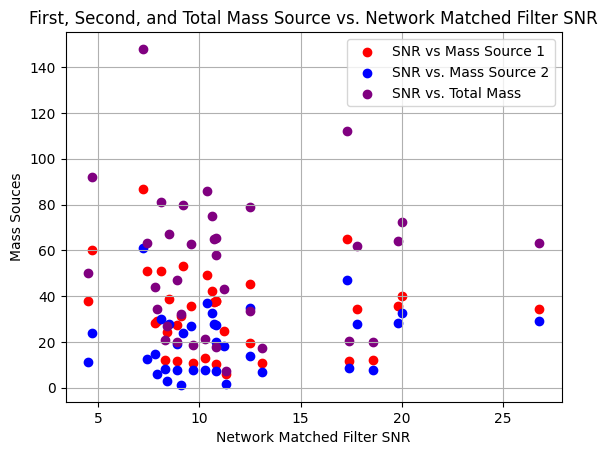

In [5]:
# Plotting First, Second, and Total Mass Source vs. Network Matched Filter SNR
# Extract data
mass_1 = conf3['mass_1_source']
mass_2 = conf3['mass_2_source']
SNR = conf3['network_matched_filter_snr']
total_mass = conf3['total_mass_source']
# Plot the data
plt.scatter(SNR, mass_1, label='SNR vs Mass Source 1', c='red')
plt.scatter(SNR, mass_2, label='SNR vs. Mass Source 2', c='blue')
plt.scatter(SNR, total_mass, label='SNR vs. Total Mass', c='purple')
plt.xlabel('Network Matched Filter SNR')
plt.ylabel('Mass Souces')
plt.title('First, Second, and Total Mass Source vs. Network Matched Filter SNR')
plt.legend()
plt.grid(True)
plt.show()
# This data has a seemingly random scatter

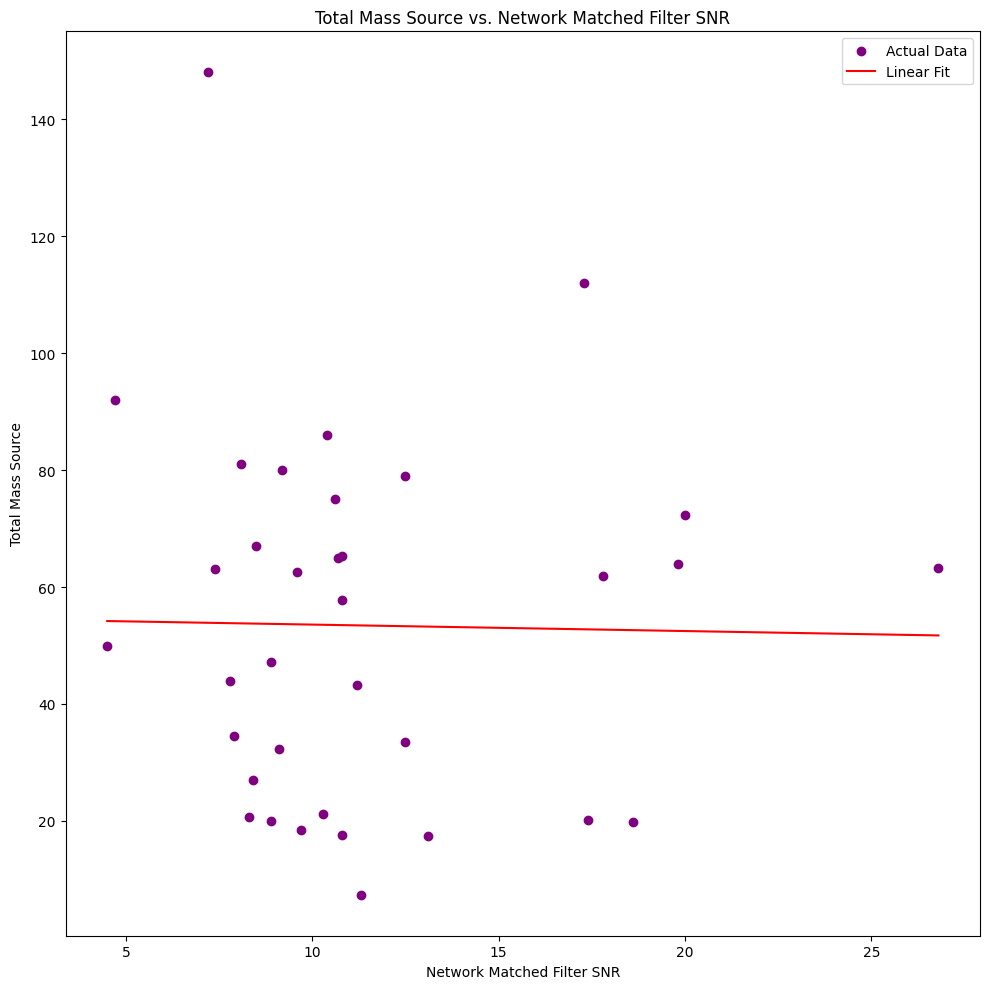

In [6]:
# Plotting Total Mass Source vs. Network Matched Filter SNR
# Variables used to call for our data
data_mass = conf3['total_mass_source']
data_SNR = conf3['network_matched_filter_snr']

# Define a linear function
def linear(y, m, b):
    return m * y + b

# Initial guess for slope and intercept
p0 = [1, 0]

# Fit the linear model to the data
parameters, covariance_matrix = curve_fit(linear, data_SNR, data_mass, p0)

# Extract the fitted parameters
slope, intercept = parameters

# Data for x and y values for the linear fit
x_fit = np.linspace(data_SNR.min(), data_SNR.max(), 100)
y_fit = linear(x_fit, slope, intercept)

# Plotting the results
plt.figure(figsize=(10, 10))

# Plot of actual data
plt.scatter(data_SNR, data_mass, c='purple', label='Actual Data')

# Plot of linear fit
plt.plot(x_fit, y_fit, 'r', label='Linear Fit')

plt.title('Total Mass Source vs. Network Matched Filter SNR')
plt.xlabel('Network Matched Filter SNR')
plt.ylabel('Total Mass Source')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
print(parameters)

[-0.11038851 54.68070733]


In [8]:
# This shows that the error is somewhat small
m = parameters[0]
m_error = (covariance_matrix[0,0]) ** 0.5

print('The Parameters are: ',parameters)
print('Error in Slope = {0:1.5f} (+/-) {1:1.5f}'.format(m, m_error))

The Parameters are:  [-0.11038851 54.68070733]
Error in Slope = -0.11039 (+/-) 1.12547


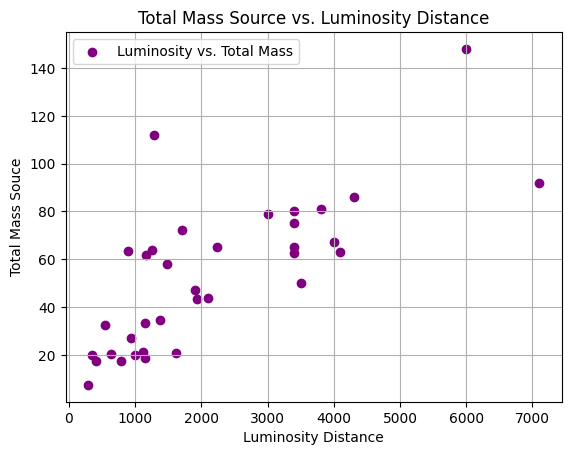

In [9]:
# Plot of Luminosity vs. Total Mass Source
# Extract data
luminosity = conf3['luminosity_distance']
total_mass = conf3['total_mass_source']
# Plot the data
plt.scatter(luminosity, total_mass, label='Luminosity vs. Total Mass', c='purple')
plt.xlabel('Luminosity Distance')
plt.ylabel('Total Mass Souce')
plt.title('Total Mass Source vs. Luminosity Distance')
plt.legend()
plt.grid(True)
plt.show()

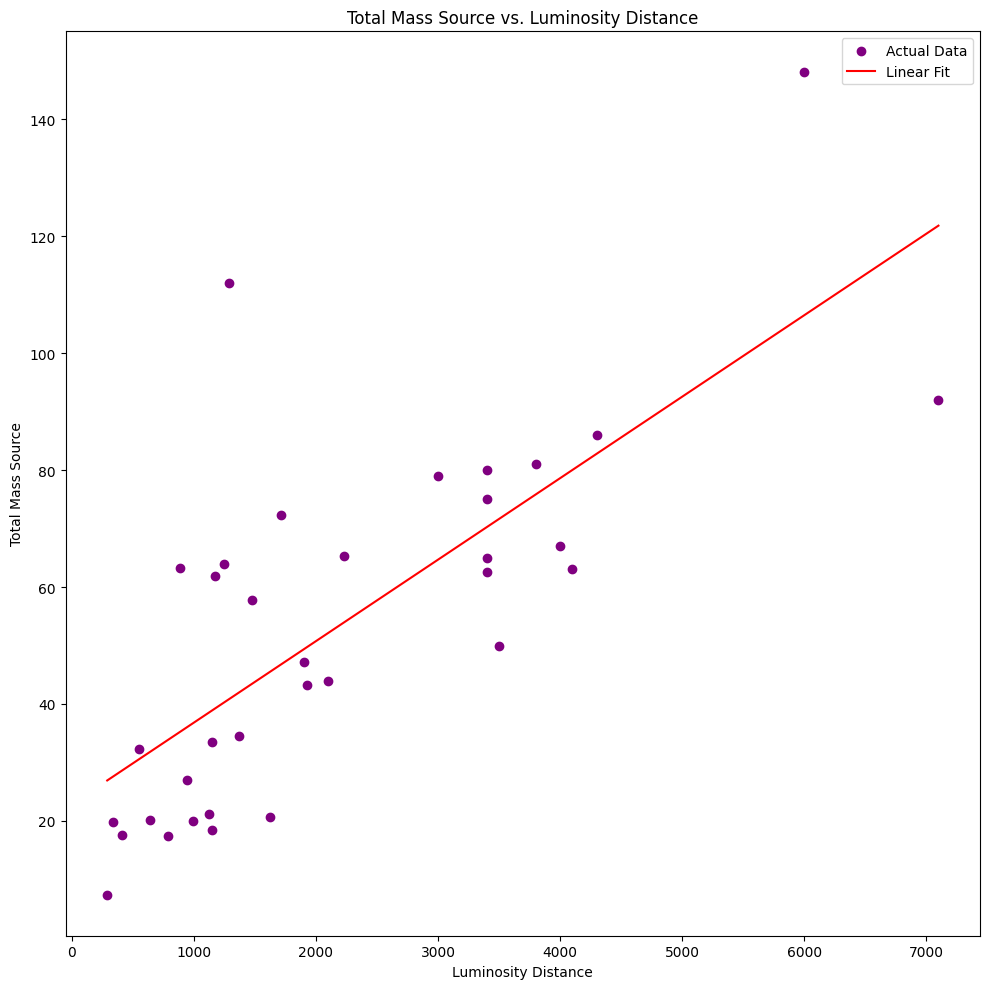

In [10]:
# Variables used to call for our data
data_mass = conf3['total_mass_source']
data_lumin = conf3['luminosity_distance']

# Define a linear function
def linear(y, m, b):
    return m * y + b

# Initial guess at parameters
p0 = [1, 0]  # Initial guess for slope and intercept

# Fit the linear model to the data
para, covariance_matrix = curve_fit(linear, data_lumin, data_mass, p0)

# Extract the fitted parameters
slope, intercept = para

# Data for x and y values for the linear fit
x_fit = np.linspace(data_lumin.min(), data_lumin.max(), 100)
y_fit = linear(x_fit, slope, intercept)

# Plotting the results
plt.figure(figsize=(10, 10))

# Plot of actual data
plt.scatter(data_lumin, data_mass, c='purple', label='Actual Data')

# Plot of linear fit
plt.plot(x_fit, y_fit, 'r', label='Linear Fit')

plt.title('Total Mass Source vs. Luminosity Distance')
plt.xlabel('Luminosity Distance')
plt.ylabel('Total Mass Source')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
print(para)

[1.39319812e-02 2.28813636e+01]


In [12]:
# This shows that the error is quite small
m = para[0]
m_error = (covariance_matrix[0,0]) ** 0.5

print('The Parameters are: ',para)
print('Error in Slope = {0:1.5f} (+/-) {1:1.5f}'.format(m, m_error))

The Parameters are:  [1.39319812e-02 2.28813636e+01]
Error in Slope = 0.01393 (+/-) 0.00222
